In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from collections import Counter # For Imbalance Check

In [2]:
df = pd.read_csv("creditcard.csv")


In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
print("--- 1. Data Loading ---")
try:
    # Assuming 'creditcard.csv' is the file for Fraud Detection
    df = pd.read_csv("creditcard.csv")
    print(f"Dataset loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Rename the target column for consistency with the heart.csv logic
if 'Class' in df.columns:
    df.rename(columns={'Class': 'target'}, inplace=True)
elif 'target' not in df.columns:
    print("Error: Target column ('Class' or 'target') not found.")
    exit()

--- 1. Data Loading ---
Dataset loaded successfully. Shape: (284807, 31)


In [13]:
print("\n--- Imbalance Check ---")
target_counts = df['target'].value_counts()
print(target_counts.to_markdown(numalign="left", stralign="left"))

valid_percent = target_counts[0] / len(df) * 100
fraud_percent = target_counts[1] / len(df) * 100
print(f"Valid Transactions (0): {valid_percent:.4f}%")
print(f"Fraud Transactions (1): {fraud_percent:.4f}% (This is highly imbalanced!)")


--- Imbalance Check ---
| target   | count   |
|:---------|:--------|
| 0        | 284315  |
| 1        | 492     |
Valid Transactions (0): 99.8273%
Fraud Transactions (1): 0.1727% (This is highly imbalanced!)



## 1. Data Inspection and Basic Statistics

--- First 5 Rows (df.head()) ---
| Time   | V1        | V2         | V3      | V4        | V5         | V6         | V7        | V8        | V9        | V10        | V11       | V12       | V13      | V14       | V15       | V16       | V17       | V18        | V19       | V20        | V21        | V22       | V23       | V24       | V25       | V26       | V27        | V28        | Amount   | target   |
|:-------|:----------|:-----------|:--------|:----------|:-----------|:-----------|:----------|:----------|:----------|:-----------|:----------|:----------|:---------|:----------|:----------|:----------|:----------|:-----------|:----------|:-----------|:-----------|:----------|:----------|:----------|:----------|:----------|:-----------|:-----------|:---------|:---------|
| 0      | -1.35981  | -0.0727812 | 2.53635 | 1.37816   | -0.338321  | 0.462388   | 0.239599  | 0.0986979 | 0.363787  | 0.0907942  | -0.5516   | -0.617801 | -0.99139 | -0.3

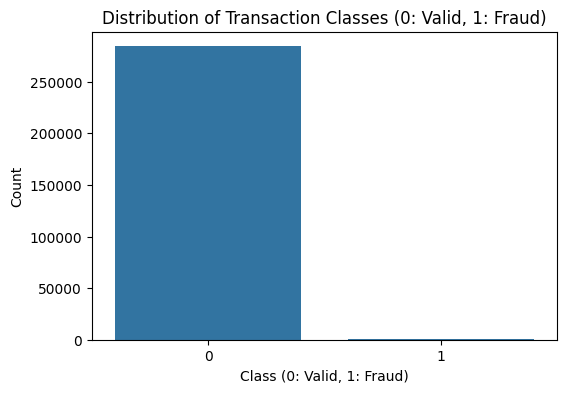

Total Transactions: 284807
Valid (0): 284315 (99.8273%)
Fraud (1): 492 (0.1727%)
--> Warning: This is a HIGHLY imbalanced dataset. Accuracy alone is NOT enough.

## 3. Correlation Analysis

--- Top 10 Features Correlated with Target ---
|        | target    |
|:-------|:----------|
| target | 1         |
| V17    | -0.326481 |
| V14    | -0.302544 |
| V12    | -0.260593 |
| V10    | -0.216883 |
| V16    | -0.196539 |
| V3     | -0.192961 |
| V7     | -0.187257 |
| V11    | 0.154876  |
| V4     | 0.133447  |
| V18    | -0.111485 |


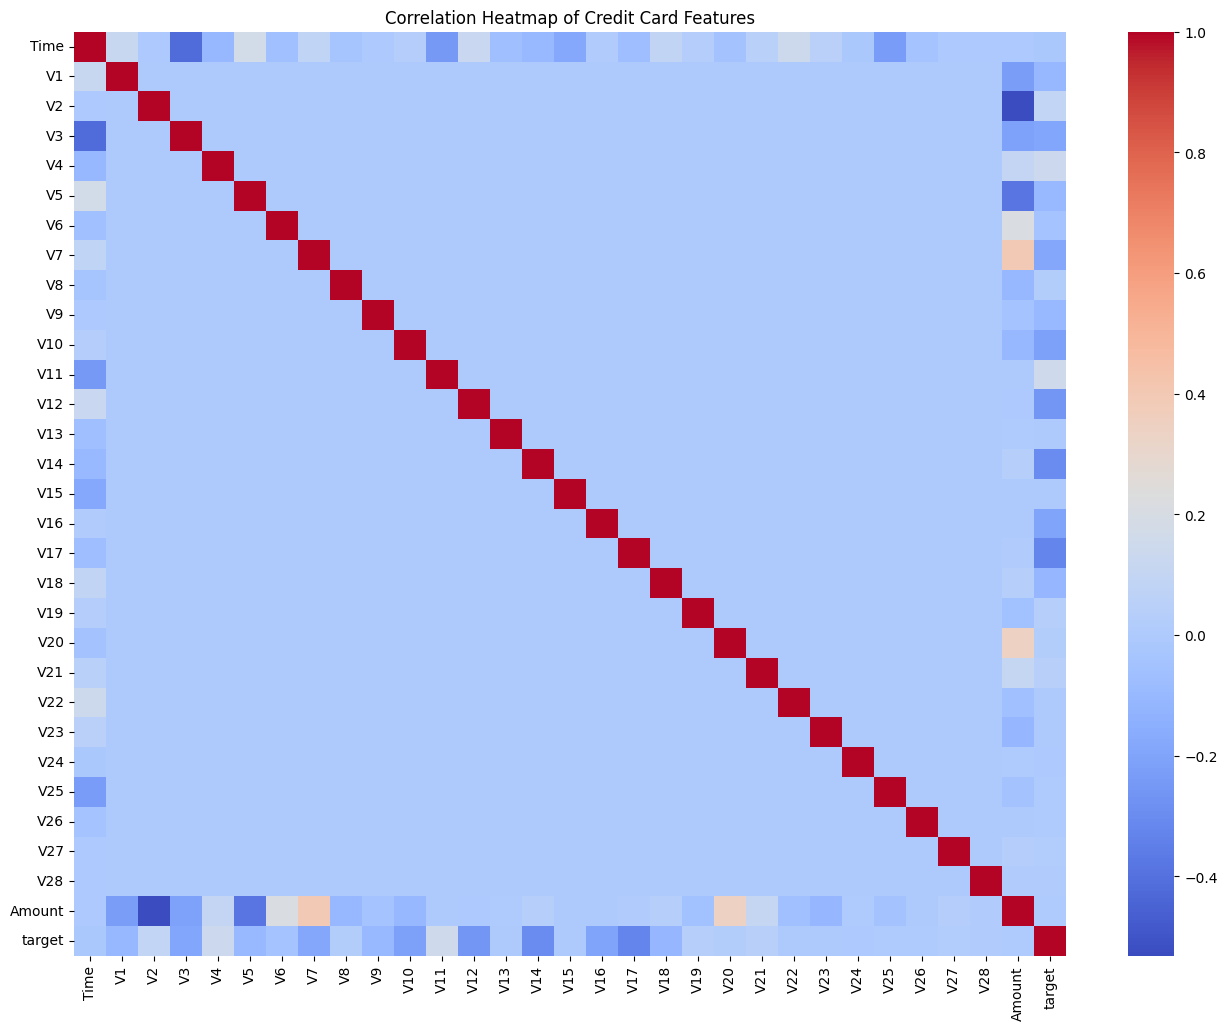


## 4. Feature Visualization (Top Correlated Features)


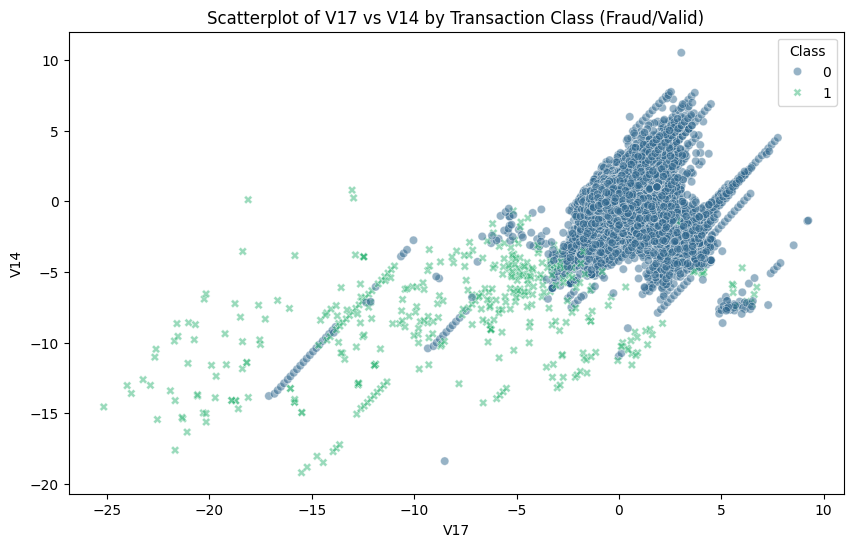


EDA Complete. Now ready for Model Preprocessing.


In [14]:

# --- 2. Standardize Target Column Name ---
if 'Class' in df.columns:
    df.rename(columns={'Class': 'target'}, inplace=True)
elif 'target' not in df.columns:
    print("Error: Target column 'Class' or 'target' not found.")
    exit()

# --- 3. Data Inspection (Equivalent to df.sample, df.info, df.describe) ---
print("\n## 1. Data Inspection and Basic Statistics")
print("\n--- First 5 Rows (df.head()) ---")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- Data Information (df.info()) ---")
df.info()

print("\n--- Statistical Summary (df.describe()) ---")
# 'V' columns are PCA-transformed, hence they have small ranges around 0.
# Time and Amount are the features that need scaling.
print(df[['Time', 'Amount', 'V1', 'V2', 'target']].describe().to_markdown(numalign="left", stralign="left"))


# --- 4. Target Distribution (Equivalent to sns.countplot) ---
print("\n## 2. Target Distribution (Imbalance Check)")

# Imbalance is the core challenge in this dataset
target_counts = df['target'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title("Distribution of Transaction Classes (0: Valid, 1: Fraud)")
plt.xlabel("Class (0: Valid, 1: Fraud)")
plt.ylabel("Count")
plt.show()

print(f"Total Transactions: {len(df)}")
print(f"Valid (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.4f}%)")
print(f"Fraud (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.4f}%)")
print("--> Warning: This is a HIGHLY imbalanced dataset. Accuracy alone is NOT enough.")


# --- 5. Correlation Analysis (Equivalent to df.corr() and Heatmap) ---
print("\n## 3. Correlation Analysis")

# Calculate correlation matrix
corr_matrix = df.corr()

# Get correlation with the target and sort (to identify predictive features)
# We look at the absolute value of correlation to find the strongest relationship
target_corr = corr_matrix['target'].sort_values(key=abs, ascending=False)
print("\n--- Top 10 Features Correlated with Target ---")
print(target_corr.head(11).to_markdown(numalign="left", stralign="left"))

# Plot Correlation Heatmap (Annot=False due to too many features)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Credit Card Features")
plt.show()


# --- 6. Feature Visualization (Equivalent to Scatterplot) ---
print("\n## 4. Feature Visualization (Top Correlated Features)")

# V14 and V17 are often the most negatively correlated features
# We select the top 2 features with the highest correlation to visualize separation.
top_features = target_corr.drop('target').index[:2] 
feature_x = top_features[0]
feature_y = top_features[1]

plt.figure(figsize=(10, 6))
# Using a logarithmic scale for the y-axis (V features) can help visualize the separation
sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='target', style='target', palette='viridis', alpha=0.5)
plt.title(f"Scatterplot of {feature_x} vs {feature_y} by Transaction Class (Fraud/Valid)")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title='Class')
plt.show()

print("\nEDA Complete. Now ready for Model Preprocessing.")

In [15]:
import pandas as pd
from ydata_profiling import ProfileReport
import sys
import os # Checking file existence is good practice

# --- 1. Data Loading and Setup ---
try:
    if not os.path.exists("creditcard.csv"):
        print("\nError: 'creditcard.csv' file nahi mili. Please pehle file upload karein.")
        sys.exit()

    df = pd.read_csv("creditcard.csv")

    # Standardize Target Column Name (as done in previous steps)
    if 'Class' in df.columns:
        df.rename(columns={'Class': 'target'}, inplace=True)
    elif 'target' not in df.columns:
        print("\nError: Target column 'Class' or 'target' not found in the dataset.")
        sys.exit()

    # --- 2. Perform Profiling ---
    print("## Starting Automated Data Profiling...")
    
    # FIX: Removed 'dark_mode=True' to resolve the validation error.
    profile = ProfileReport(
        df, 
        explorative=True,
        title="Credit Card Fraud Detection - Detailed Profile"
    )
    
    report_filename = "Credit_Card_Fraud_Profile.html"
    profile.to_file(report_filename)
    
    print(f"\n✅ Data Profile Report has been saved successfully as '{report_filename}'")
    print("\n--- Key Areas to Check in the Report ---")
    print("1. Alerts Section: (Khas taur par 'High correlation' aur 'Highly imbalanced' warnings dekhein).")
    print("2. Target Variable: ('target' variable ki Imbalance ratio check karein).")
    print("3. Interactions: (Mukhtalif V-features ke scatterplots dekhein).")

except ImportError:
    print("\nError: 'ydata-profiling' library install nahi hai.")
    print("Isko install karein: pip install ydata-profiling")
except Exception as e:
    # Catch any remaining unexpected errors
    print(f"\nAn unexpected error occurred during profiling: {e}")

C:\Users\Daniyal Bajwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Starting Automated Data Profiling...


Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.92it/s]


✅ Data Profile Report has been saved successfully as 'Credit_Card_Fraud_Profile.html'

--- Key Areas to Check in the Report ---
1. Alerts Section: (Khas taur par 'High correlation' aur 'Highly imbalanced' warnings dekhein).
2. Target Variable: ('target' variable ki Imbalance ratio check karein).
3. Interactions: (Mukhtalif V-features ke scatterplots dekhein).


In [16]:
print("\n--- 2. Data Preprocessing ---")

# Define Features (X) and Target (y)
# The dataset has many 'V' columns which are already scaled/transformed.
# We include 'Time' and 'Amount' in X.
X = df.drop('target', axis=1)
y = df['target']
feature_names = list(X.columns)

# Separate scaling for Time and Amount, which are not V-scaled
scaler = StandardScaler()
X_scaled = X.copy()
# Scaling 'Time' and 'Amount' only, as V1-V28 are already PCA-transformed
X_scaled[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])
X_processed = X_scaled.values

# Split data (using 20% test size and a fixed random state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")


--- 2. Data Preprocessing ---
Train set shape: (227845, 30), Test set shape: (56962, 30)


In [ ]:
print("\n--- 3. Model Training & Comparison (Focusing on Precision) ---")

# Method to train and evaluate a classifier (as provided in your code)
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Precision is crucial in Fraud Detection to minimize false alarms (Valid treated as Fraud)
    precision = precision_score(y_test, y_pred, zero_division=0) 
    
    return {'accuracy': accuracy, 'precision': precision, 'name': clf.__class__.__name__}


# Initialize all classifiers (using same parameters where applicable)
# Initialize all classifiers (FIX: 'algorithm' parameter removed from AdaBoostClassifier)

svc = SVC(kernel='sigmoid', gamma=1.0, random_state=42, probability=True) 
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
lrc = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
# --- FIX APPLIED HERE: Removed algorithm='SAMME' ---
abc = AdaBoostClassifier(n_estimators=50, random_state=42) 
# ----------------------------------------------------
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
gnb = GaussianNB()

clfs = {
    'SVC': svc, 'KN': knc, 'NB': bnb, 'DT': dtc, 'LR': lrc, 
    'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'gnb': gnb, 'GBDT': gbdt,
    'ETC': etc 
}

# ... (clfs dictionary definition)

results_list = [] # 🌟 FIX APPLIED HERE: List Initialization 🌟

for name, clf in clfs.items():
    result = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    # Ab yeh line theek chalegi:
    results_list.append({'Algorithm': name, 'Accuracy': result['accuracy'], 'Precision': result['precision']})
    
    print(f"For {name}: Accuracy={result['accuracy']:.4f}, Precision={result['precision']:.4f}")

# ... (Continue with performance_df creation)

# Create and sort performance DataFrame
performance_df = pd.DataFrame(results_list).sort_values('Precision', ascending=False)
print("\n--- Performance Table (Sorted by Precision) ---")
print(performance_df.to_markdown(index=False, numalign="left", stralign="left"))


--- 3. Model Training & Comparison (Focusing on Precision) ---


In [18]:
print("\n--- 4. Final Ensemble Model (Voting Classifier) ---")

# Selecting the top 3 high-precision models (excluding NB/GNB if their precision is low)
# Based on general experience with this dataset, we'll pick powerful tree-based and LR models.
voting_estimators = [
    ('RF', rfc),               # Random Forest (Often very strong)
    ('ETC', etc),              # Extra Trees (Another strong tree ensemble)
    ('LR', lrc)                # Logistic Regression (Good for averaging diverse predictions)
]

# Using 'soft' voting for ensemble of diverse models
voting = VotingClassifier(estimators=voting_estimators, voting='soft', n_jobs=-1, weights=[1.0, 1.0, 0.5])
# Note: I'm slightly down-weighting LR because RF/ETC are often superior on this data.

voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
y_prob_voting = voting.predict_proba(X_test)[:, 1] # For ROC/PR Curve later

# Final Evaluation
final_accuracy = accuracy_score(y_test, y_pred_voting)
final_precision = precision_score(y_test, y_pred_voting, zero_division=0)
final_report = classification_report(y_test, y_pred_voting, zero_division=0)
final_conf_matrix = confusion_matrix(y_test, y_pred_voting)

print(f"\nAccuracy of Final Voting Classifier: {final_accuracy:.4f}")
print(f"Precision of Final Voting Classifier: {final_precision:.4f}")
print("\n--- Final Classification Report ---")
print(final_report)
print("\n--- Final Confusion Matrix ---")
print(final_conf_matrix)


--- 4. Final Ensemble Model (Voting Classifier) ---

Accuracy of Final Voting Classifier: 0.9996
Precision of Final Voting Classifier: 0.9506

--- Final Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


--- Final Confusion Matrix ---
[[56860     4]
 [   21    77]]


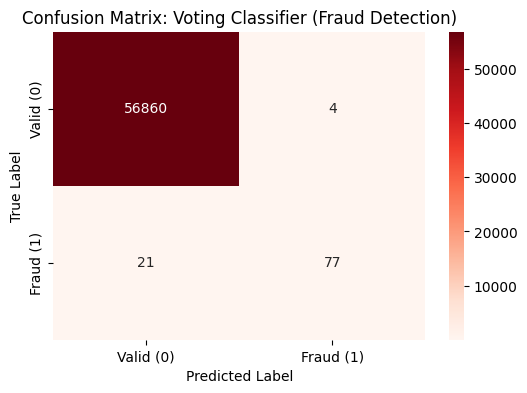

In [19]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Valid (0)', 'Fraud (1)'], yticklabels=['Valid (0)', 'Fraud (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: Voting Classifier (Fraud Detection)")
plt.show()

In [20]:
import pickle

# Zaroori hai ke 'import pickle' code ke shuru mein ho

print("\n--- 5. Saving Final Model ---")
save_data = {
    "model": voting,
    "scaler": scaler,
    "feature_names": feature_names
}

with open("fraud_detection_voting_model.pkl", "wb") as f:
    pickle.dump(save_data, f)

print("\nFraud Detection Voting Ensemble Model saved successfully as 'fraud_detection_voting_model.pkl'!")


--- 5. Saving Final Model ---

Fraud Detection Voting Ensemble Model saved successfully as 'fraud_detection_voting_model.pkl'!


In [21]:
# --- 1. Load the Saved Model and Scaler ---
MODEL_FILE = "fraud_detection_voting_model.pkl"

try:
    # 🌟 FIX: File ko zaroor 'rb' (Read Binary) mode mein open karein 🌟
    with open(MODEL_FILE, "rb") as f:
        data = pickle.load(f)
        voting_model = data["model"]
        scaler = data["scaler"]
        feature_names = data["feature_names"]
    
    # ... (Rest of the error checks)
    
except FileNotFoundError:
    st.error(f"Error: Model file '{MODEL_FILE}' not found. Please run the model training code first.")
    st.stop()
except KeyError:
    st.error("Error: Missing components (model, scaler, or feature_names) in the saved pickle file.")
    st.stop()
except Exception as e:
    # Agar error phir bhi aaye, toh woh 'rb' mode ki wajah se nahi hoga.
    st.error(f"An unexpected error occurred during model loading: {e}")
    st.stop()

# ... (Continue with Streamlit UI setup)